In [1]:
import numpy as np
import keras
from keras.datasets import mnist
import math
import pickle
import csv
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train.shape

(60000, 28, 28)

In [3]:
y_train.shape

(60000,)

In [4]:
for a in range(len(y_train)):           # Training data for 5 
    if (y_train[a]==y_train[0]):
        y_train[a]=1
    else:
        y_train[a]=0

In [5]:
y_train

array([1, 0, 0, ..., 0, 0, 0], dtype=uint8)

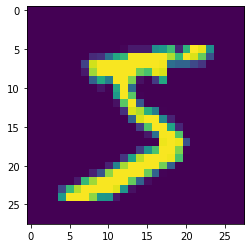

In [7]:
#uses matplotlib to display values stored in mnist_data.
import matplotlib.pyplot as plt
image=x_train[0]
plt.imshow(image) #display one image out of the other.
plt.show() #display multiple images together

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.wrappers.scikit_learn import KerasClassifier
from keras import backend as K
from sklearn.model_selection import GridSearchCV

In [9]:
num_classes = 10

In [10]:
img_rows, img_cols = 28, 28

In [11]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)


In [12]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [13]:
# convert class vectors to binary class matrices
# y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_train.shape

(60000,)

In [14]:
y_train.argmax(axis=0)

0

In [15]:
x_train.size

47040000

In [16]:
x_train.ndim

4

In [17]:
x_train.shape

(60000, 28, 28, 1)

In [18]:
# print(x_train[34])

In [20]:
f_img_array = [item.flatten() for item in x_train]       # Arraysize = 60k, flattened image pixels

In [21]:
weights = np.asarray([0.0 for count in range(x_train.shape[1] * x_train.shape[2] + 1)])
weights.shape = (weights.shape[0], 1)
weights.shape

(785, 1)

In [22]:
weights2 = np.random.randn(x_train.shape[1]*x_train.shape[2]*2+1,1)
weights2.shape

(1569, 1)

In [23]:
def file_write(filename, weight_list):
    with open(filename, 'w') as myfile:
        wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
        wr.writerow(weight_list)

In [24]:
def w_sum(image, weight):
    image2=image.flatten()
    wgt_sum=0
    wgt_sum+=weight[0]
    img_counter=0
    
    for i in range (1, len(image2)*2+1):
        if (i in range(1,785)):
            wgt_sum += (weight[i]*((image2[i-1])**2))
            img_counter+=1 
        else:
            wgt_sum += (weight[i] * (image2[i-784-1]))
        
    return wgt_sum

In [25]:
def total_w_sum(image_array, weight):
    lenth=len(image_array)

    t_w_sum = np.arange(lenth, dtype=float)

    for i in range(len(image_array)):
        t_w_sum[i] = w_sum(image_array[i], weight)
        
    return t_w_sum

In [26]:
def activate_func(value):
    if value > 500:
        value = 500
    if value < -500:
        value = -500
    out_value=0
    out_value=1/(1+math.exp(-1 * value))
    return out_value

In [27]:
def t_activation(in_array):
    activ_array = np.asarray([0.0 for count in range(len(in_array))])
    
    for b in range(len(in_array)):
        value=activate_func(in_array[b])
        if (value>0.7):
            activ_array[b]=1
        else:
            activ_array[b]=0
        
    return activ_array

In [28]:
# t_activation(output)
accurate=0
accurate2=0

In [29]:
#loss function basically works to fix misclassified images only. For all 
#other correctly classified images, the diff goes to 0.

def loss_func(learn_rate, image, expected, predicted, weights_array):
    
    error=np.asarray([0.0 for count in range(len(weights_array))])
    diff=(expected-predicted)*predicted*(1-predicted)                      #predicted value comes from the activation function
    
    if (diff == 0):
        global accurate
        accurate+=1
    #assigning the correct weights for an image of 5.
        
    if (diff!=0):
        error[0]=learn_rate*diff                     #error for bias term is calculated using a weighted sum of 1
        for j in range(1, len(weights_array)):       #iterate in every pixel of the image = 784
            if (j in range(1,784)):
                error[j]=learn_rate*diff*image[j-1]**2   #calculate the error of every pixel in misclassified image for 5
            else:
                error[j]=learn_rate*diff*image[j-1-784]
    
        for t in range(len(weights_array)):
            weights_array[t]+=error[t]               #updating the weights for every pixel in image

In [30]:
def t_loss_func(learn_rate, images_arr, expected_arr, predicted_array, weights_array):
    
    global accurate
    accurate=0
    for i in range(0, len(predicted_array)):   #iterate 60k times
        loss_func(learn_rate, images_arr[i], expected_arr[i], predicted_array[i], weights_array)
    
    for t in range(len(weights_array)):        #prints 785 new updated weights
        print(weights_array[t])

In [31]:
def main():
    for i in range(2):
        output=np.array([])
        output = total_w_sum(x_train, weights2)
        t_loss_func(0.0001, f_img_array, y_train, t_activation(output), weights2)
        print('epoch ends\n\n\n')
        print ("accuracy is {}\n".format(accurate/60000))

In [32]:
main()

[-1.70970647]
[0.05427166]
[-0.22129796]
[1.00189032]
[0.2541868]
[1.00690702]
[0.17294787]
[-0.08332456]
[0.12606062]
[-0.63145781]
[0.40696165]
[0.56293915]
[0.05119782]
[-0.71157474]
[-0.21346216]
[-2.27149842]
[-0.26917094]
[-1.19911416]
[0.10112154]
[-1.15619011]
[-0.49291914]
[0.58749608]
[-0.78053864]
[-0.66598521]
[-0.49160714]
[0.72161078]
[-0.42210196]
[0.20623137]
[-0.18333557]
[-0.94105253]
[1.51549112]
[0.58658448]
[-0.90037514]
[0.42439725]
[-0.68983827]
[0.56441135]
[0.29478975]
[0.65881163]
[0.49301685]
[1.10749735]
[0.53841049]
[0.45447469]
[-0.23228837]
[0.777833]
[-1.71308145]
[0.54762561]
[-0.70535466]
[1.76906927]
[0.13593819]
[1.0701738]
[0.32534043]
[-1.06254679]
[-0.00745334]
[1.2032858]
[-1.06644582]
[-1.05053797]
[1.19332209]
[-0.00521636]
[-0.85060133]
[-0.44020616]
[-1.02874557]
[0.12506083]
[-0.3850197]
[-0.8578436]
[-0.32800181]
[2.52924275]
[-1.29335365]
[0.06124954]
[-2.0561661]
[2.01189065]
[-0.026614]
[-0.26754249]
[-1.58773722]
[1.69139778]
[-0.827991

[0.3163501]
[0.00923425]
[1.14856625]
[-0.91115219]
[0.11997857]
[-0.06011383]
[0.75077626]
[-1.48730138]
[-0.03943414]
[0.06731981]
[-1.28945392]
[0.06441647]
[-0.05761277]
[-1.45198038]
[-0.27598158]
[-0.4661177]
[0.25410515]
[-0.06534862]
[0.51544203]
[0.75070453]
[-0.10787338]
[0.73374173]
[-0.70861301]
[0.9353569]
[-0.21147061]
[0.47199723]
[-0.59305812]
[-1.75954219]
[0.55429258]
[-0.46891143]
[1.49860918]
[-1.49987114]
[0.2988756]
[-0.40891778]
[-1.23383644]
[-1.93585908]
[-0.47048117]
[-0.81272646]
[0.26536428]
[-1.10071899]
[-1.51423303]
[0.73411884]
[-0.6098516]
[0.87211997]
[0.74133666]
[0.55133034]
[-1.00585402]
[1.34188033]
[-0.42352075]
[-0.73988842]
[1.29524014]
[1.25412183]
[0.95886156]
[-1.66442631]
[-0.66330919]
[-0.11566121]
[-0.16129391]
[-0.57934075]
[-1.42797179]
[-0.49287786]
[0.68258985]
[-1.58439007]
[2.17639662]
[0.04501124]
[0.13384526]
[-1.11246602]
[-0.38803204]
[1.13342992]
[0.28812383]
[1.29409558]
[1.92009801]
[-0.13077533]
[1.1530873]
[0.80834868]
[0.34

[-0.03943414]
[0.06731981]
[-1.28945392]
[0.06441647]
[-0.05761277]
[-1.45198038]
[-0.27598158]
[-0.4661177]
[0.25410515]
[-0.06534862]
[0.51544203]
[0.75070453]
[-0.10787338]
[0.73374173]
[-0.70861301]
[0.9353569]
[-0.21147061]
[0.47199723]
[-0.59305812]
[-1.75954219]
[0.55429258]
[-0.46891143]
[1.49860918]
[-1.49987114]
[0.2988756]
[-0.40891778]
[-1.23383644]
[-1.93585908]
[-0.47048117]
[-0.81272646]
[0.26536428]
[-1.10071899]
[-1.51423303]
[0.73411884]
[-0.6098516]
[0.87211997]
[0.74133666]
[0.55133034]
[-1.00585402]
[1.34188033]
[-0.42352075]
[-0.73988842]
[1.29524014]
[1.25412183]
[0.95886156]
[-1.66442631]
[-0.66330919]
[-0.11566121]
[-0.16129391]
[-0.57934075]
[-1.42797179]
[-0.49287786]
[0.68258985]
[-1.58439007]
[2.17639662]
[0.04501124]
[0.13384526]
[-1.11246602]
[-0.38803204]
[1.13342992]
[0.28812383]
[1.29409558]
[1.92009801]
[-0.13077533]
[1.1530873]
[0.80834868]
[0.34896045]
[-0.76605619]
[2.82546794]
[-0.97594299]
[1.01959277]
[2.18205474]
[-0.1224345]
[-0.44362458]
[0.1

In [33]:
weights2.shape

(1569, 1)

In [44]:
#weights3=np.delete(weights2, 0)  #delete a particular index (0) of the array.
#weights3=weights3.reshape((28,28))

In [45]:
#plt.imshow(weights3) #display one image out of the other.

In [35]:
weights2.shape

(1569, 1)

In [36]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [37]:
x_test.shape

(10000, 28, 28)

In [38]:
y_test.shape

(10000,)

In [39]:
for a in range(len(y_test)):           #changing y-train to hold binary values against digit "5". training only for 5 
    if (y_test[a]==5):
        y_test[a]=1
    else:
        y_test[a]=0

In [40]:
y_test

array([0, 0, 0, ..., 0, 1, 0], dtype=uint8)

In [41]:
def tester():
        accurate2=0 
        output=np.array([])
        output = total_w_sum(x_test, weights2)  #x-test is an array of 10k images 
        out1=t_activation(output)

        for i in range(len(out1)):
            if (out1[i]==y_test[i]):           
                accurate2+=1

        print(confusion_matrix(y_test, out1))
        
        print('test here\n')
        print ("accuracy is {}\n".format(accurate2/10000))

In [42]:
tester()

[[5935 3173]
 [ 737  155]]
test here

accuracy is 0.609



In [94]:
print(weights2.shape)

(785, 1)


In [95]:
# write list to csv file
filename="digit_5_weight"
file_write(filename, weights2)

In [23]:
confusion_matrix?
# pickle.dump(weights2, open( "weights_digit_5.p", 'wb'))
# with open("weights_5.p", "wb") as pickleFile:
#         pickle.dump(weights2, pickleFile)